In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../data/anon.xlsx', index_col=0)
df

,PK,Source Date,Qdate,Balance,Days Past Due,Times Past Due 2,Times Past Due 3,Times Past Due 4,Credit Risk Code
0,2,2015-01-31,Q1 2015,7685.03,15,10,5,1,5.0
1,3,2015-01-31,Q1 2015,181479.00,0,0,0,0,3.0
2,4,2015-01-31,Q1 2015,67382.89,0,0,0,0,3.0
3,5,2015-01-31,Q1 2015,115580.00,0,0,0,0,1.0
4,6,2015-01-31,Q1 2015,111445.00,0,0,0,0,1.0
5,7,2015-01-31,Q1 2015,1079.13,0,7,0,0,4.0
6,8,2015-01-31,Q1 2015,229571.00,0,0,0,0,1.0
7,10,2015-01-31,Q1 2015,5935.32,0,0,0,0,9.0
8,11,2015-01-31,Q1 2015,87688.90,0,0,0,0,3.0
9,12,2015-01-31,Q1 2015,10080.00,0,0,0,0,4.0


# Printing number of nulls per column

In [3]:
for column in df.columns:
    print('Column ', column,' has ',len(df[df[column].isna()]) ,' null values')

Column  PK  has  0  null values
Column  Source Date  has  0  null values
Column  Qdate  has  0  null values
Column  Balance  has  0  null values
Column  Days Past Due  has  0  null values
Column  Times Past Due 2  has  0  null values
Column  Times Past Due 3  has  0  null values
Column  Times Past Due 4  has  0  null values
Column  Credit Risk Code  has  92  null values


# Info of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264789 entries, 0 to 264788
Data columns (total 9 columns):
PK                  264789 non-null int64
Source Date         264789 non-null datetime64[ns]
Qdate               264789 non-null object
Balance             264789 non-null float64
Days Past Due       264789 non-null int64
Times Past Due 2    264789 non-null int64
Times Past Due 3    264789 non-null int64
Times Past Due 4    264789 non-null int64
Credit Risk Code    264697 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 20.2+ MB


# Description of data

In [5]:
df.describe()

,PK,Balance,Days Past Due,Times Past Due 2,Times Past Due 3,Times Past Due 4,Credit Risk Code
count,264789.000000,2.647890e+05,264789.000000,264789.000000,264789.000000,264789.000000,264697.000000
mean,5839.635140,6.957087e+04,561.647897,1.883080,0.471443,0.202678,3.995924
std,3810.249853,2.903245e+05,2207.382935,6.466896,2.201985,1.189377,1.870126
min,0.000000,-7.500000e+02,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2866.000000,7.643600e+02,0.000000,0.000000,0.000000,0.000000,3.000000
50%,5094.000000,7.791290e+03,0.000000,0.000000,0.000000,0.000000,3.000000
75%,8179.000000,3.533834e+04,0.000000,0.000000,0.000000,0.000000,4.000000
max,13675.000000,1.845092e+07,16141.000000,170.000000,108.000000,88.000000,10.000000


# Get me the dates of entries where there are NA's

In [6]:
for column in df.columns:
    if(len(df[df[column].isna()])>0):
        print(column)
        print(df['Source Date'].value_counts())
        

Credit Risk Code
2020-06-30    13114
2020-05-29    12499
2020-04-30    12434
2020-03-31    12318
2020-02-28    12100
2020-01-31    11993
2015-01-31     4962
2015-02-28     4834
2015-03-31     4733
2015-04-30     4602
2015-05-31     4512
2015-06-30     4449
2015-07-31     4380
2015-08-31     4319
2015-10-31     4192
2016-01-31     4190
2015-11-30     4139
2016-02-29     4102
2015-03-03     4068
2016-03-31     4036
2016-04-30     3957
2016-06-30     3834
2016-07-31     3784
2016-05-31     3711
2016-08-31     3710
2016-10-31     3595
2016-12-31     3520
2016-09-30     3476
2017-01-31     3463
2017-02-28     3399
              ...  
2017-06-30     3228
2017-08-31     3157
2017-07-31     3015
2017-09-30     2928
2017-11-30     2915
2018-03-31     2825
2018-04-30     2792
2018-05-31     2771
2017-10-31     2769
2018-06-30     2747
2018-07-31     2704
2018-01-31     2696
2018-02-28     2681
2018-08-31     2681
2018-09-30     2656
2018-10-31     2634
2018-11-30     2602
2018-12-31     2564
201

# Get me the accounts with missing values

In [7]:
for column in df.columns:
    if(len(df[df[column].isna()])>0):
        print(column)
        print(df['PK'].value_counts())
        

Credit Risk Code
12997    67
2366     66
8137     66
615      66
1214     66
2689     66
1899     65
12603    65
12144    65
12549    65
7664     65
7830     65
5822     65
12856    65
2413     65
489      65
529      65
12558    65
11849    65
11749    65
8136     65
12281    65
34       65
7816     65
11881    65
6463     65
12165    65
11880    65
7636     65
12095    65
         ..
10116     1
10161     1
5637      1
10123     1
10084     1
10138     1
10191     1
10137     1
2927      1
10158     1
6392      1
10132     1
10169     1
5636      1
10238     1
10183     1
5778      1
10067     1
10195     1
10242     1
7         1
10218     1
10105     1
10269     1
10213     1
10157     1
4791      1
110       1
10106     1
10210     1
Name: PK, Length: 13676, dtype: int64


# Distribution of Balance w/o NAN's

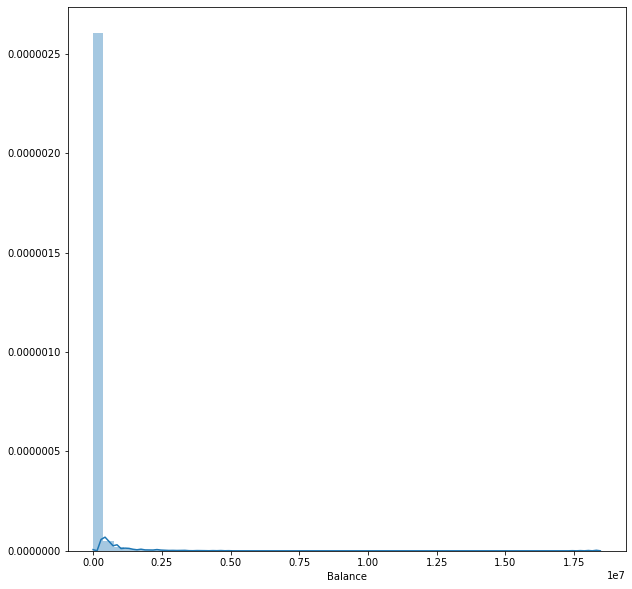

In [8]:
plt.subplots(figsize=(10,10))
sns.distplot(df['Balance'].dropna())

Text(0, 0.5, 'Count')

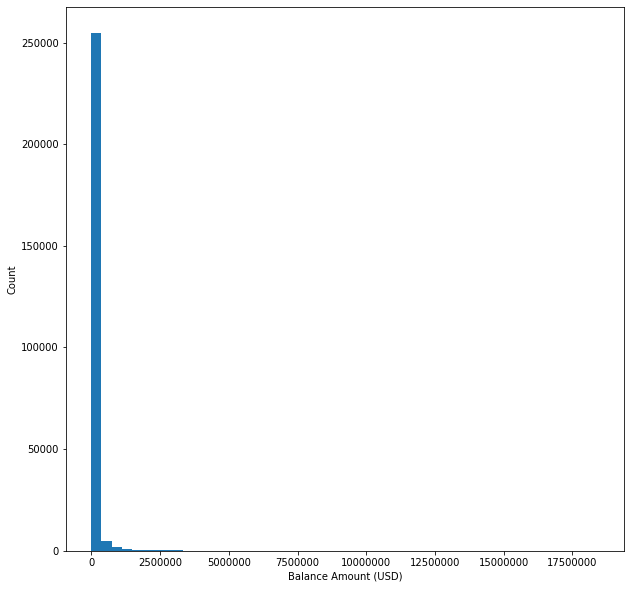

In [9]:
plt.subplots(figsize=(10,10))
plt.hist(df['Balance'].dropna(), bins=50)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))
plt.xlabel('Balance Amount (USD)')
plt.ylabel('Count')

# Distribution of Credit Risk Code w/o NAN's

Credit Risk Code
1.0       8035
2.0        432
3.0     140463
4.0      67042
4.5        102
5.0      11568
6.0       3090
6.5        186
7.0      13565
8.0       5562
9.0       4766
10.0      9886
dtype: int64


([<matplotlib.axis.XTick at 0x1e7d7fb4390>,
 <a list of 12 Text xticklabel objects>)

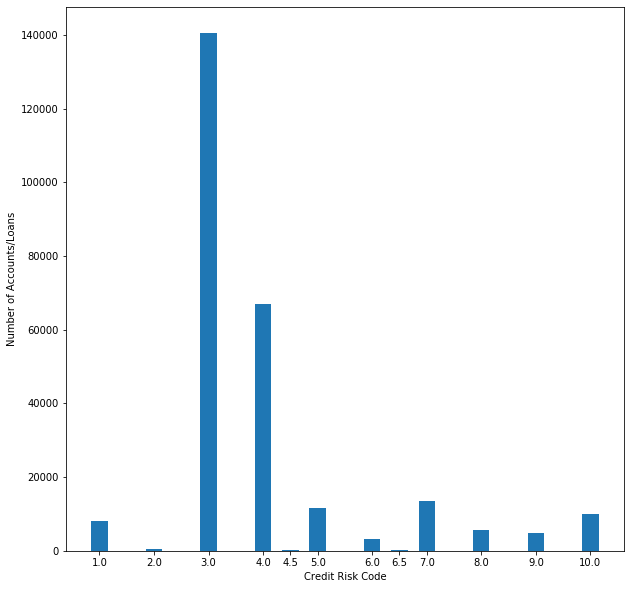

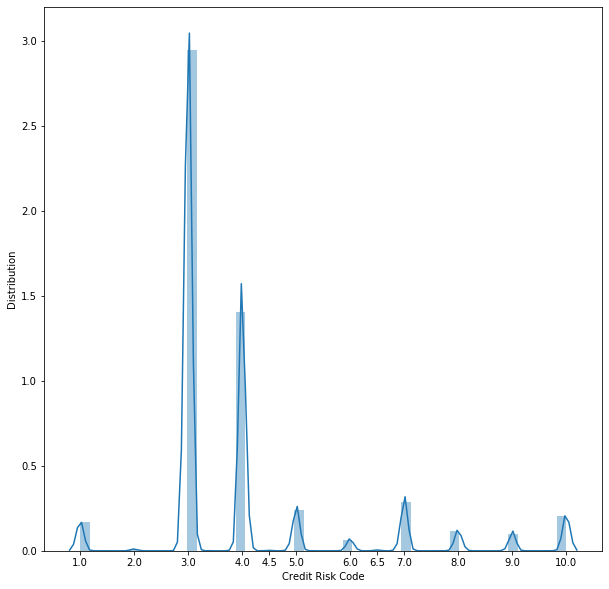

In [10]:
print(df.groupby('Credit Risk Code').size())
plt.subplots(figsize=(10,10))
plt.bar(df.groupby('Credit Risk Code').size().index,
        df.groupby('Credit Risk Code').size().values,
       align='center',
       width=0.3)
plt.xlabel('Credit Risk Code')
plt.ylabel('Number of Accounts/Loans')
plt.xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])


plt.subplots(figsize=(10,10))
sns.distplot(df['Credit Risk Code'].dropna())
plt.xlabel('Credit Risk Code')
plt.ylabel('Distribution')
plt.xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])

# Average Balance by Credit Risk Code

Credit Risk Code
1.0      12178.552106
2.0     105556.469606
3.0      47990.149479
4.0     133866.466773
4.5       6917.455294
5.0      98767.848872
6.0      96945.026265
6.5     808370.657151
7.0      37391.498430
8.0      54787.090428
9.0       4129.474310
10.0     13892.069322
Name: Balance, dtype: float64


([<matplotlib.axis.XTick at 0x1e7d8ffc0b8>,
 <a list of 12 Text xticklabel objects>)

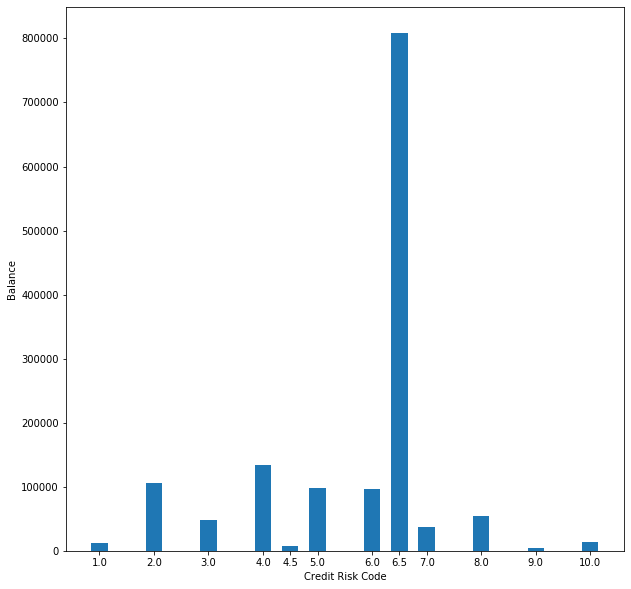

In [11]:
plt.subplots(figsize=(10,10))
print(df.groupby('Credit Risk Code')['Balance'].mean())
plt.bar(df.groupby('Credit Risk Code')['Balance'].mean().index,
        df.groupby('Credit Risk Code')['Balance'].mean().values,
       align='center',
       width=0.3)
plt.xlabel('Credit Risk Code')
plt.ylabel('Balance')
plt.xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])

# Balance and Credit Risk Code Weighted

Text(0.5, 0, 'Credit Risk Code')

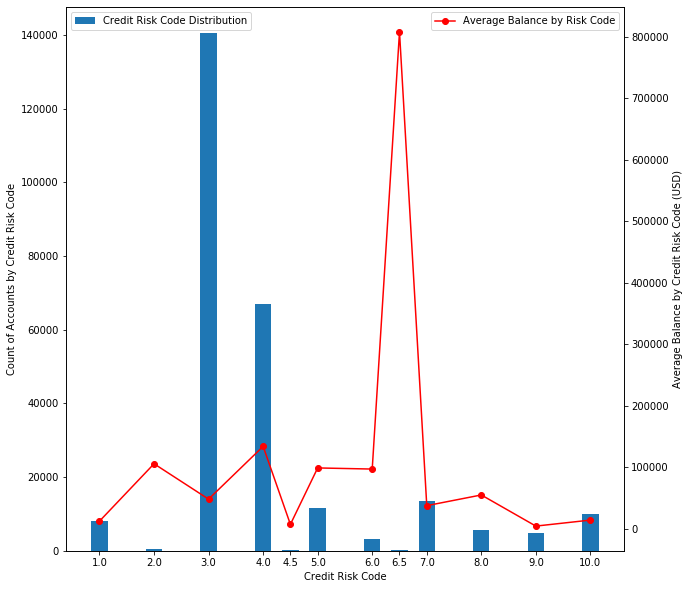

In [24]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()
ax1.bar(df.groupby('Credit Risk Code').size().index,
        df.groupby('Credit Risk Code').size().values,
       align='center',
       width=0.3)
ax2.plot(df.groupby('Credit Risk Code')['Balance'].mean().index,
        df.groupby('Credit Risk Code')['Balance'].mean().values,
        'r-o')
ax1.set_ylabel('Count of Accounts by Credit Risk Code')
ax2.set_ylabel('Average Balance by Credit Risk Code (USD)')
ax1.set_xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])
ax2.legend(['Average Balance by Risk Code'])
ax1.legend(['Credit Risk Code Distribution'],loc='upper left')
ax1.set_xlabel('Credit Risk Code')

In [13]:
df.groupby('Credit Risk Code')['Balance'].agg({"Balance":'mean'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Balance
Credit Risk Code,
1.0,12178.552106
2.0,105556.469606
3.0,47990.149479
4.0,133866.466773
4.5,6917.455294
5.0,98767.848872
6.0,96945.026265
6.5,808370.657151
7.0,37391.498430


In [14]:
df1 = pd.merge(df.groupby('Credit Risk Code')['Balance'].agg({"Balance":'mean'}),
         pd.DataFrame(df.groupby('Credit Risk Code')[['Credit Risk Code','Balance']].size()),
        left_index=True,
        right_index=True)
df1.columns = ['Balance', 'Count']
df1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Balance,Count
Credit Risk Code,,
1.0,12178.552106,8035
2.0,105556.469606,432
3.0,47990.149479,140463
4.0,133866.466773,67042
4.5,6917.455294,102
5.0,98767.848872,11568
6.0,96945.026265,3090
6.5,808370.657151,186
7.0,37391.498430,13565


# Days Past Due Investigation

In [15]:
df['Days Past Due'].value_counts()

0        223314
9          1272
6          1158
8          1053
3           997
4           965
5           941
7           939
1           877
2           838
15          636
16          556
14          505
13          436
25          389
26          388
10          376
11          358
24          350
12          294
21          292
23          284
20          273
29          258
28          251
19          243
17          232
22          231
30          198
27          192
          ...  
9052          1
13150         1
7259          1
9308          1
13406         1
1368          1
10464         1
5021          1
11613         1
229           1
344           1
14431         1
3486          1
5205          1
3158          1
11930         1
1439          1
13905         1
9811          1
5717          1
1623          1
4327          1
12114         1
2532          1
5973          1
1879          1
14818         1
7580          1
6235          1
3043          1
Name: Days Past Due, Len

Text(0.5, 0, 'Days Past Due Binned')

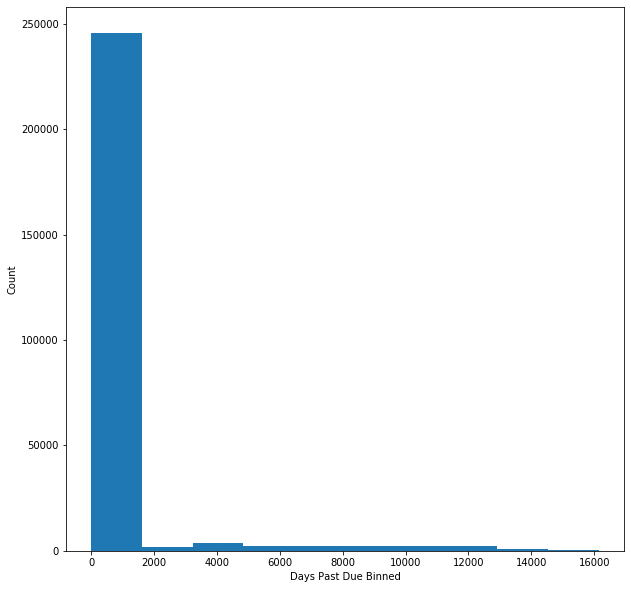

In [16]:
plt.subplots(figsize=(10,10))
plt.hist(df['Days Past Due'])
plt.ylabel('Count')
plt.xlabel('Days Past Due Binned')

## Average days past due grouped by credit risk code

Credit Risk Code
1.0         6.491475
2.0         0.402778
3.0        15.590433
4.0        14.562573
4.5      3334.509804
5.0       108.579876
6.0      2227.208414
6.5      2964.301075
7.0       148.341836
8.0      2640.167745
9.0     10863.191565
10.0     6844.972082
Name: Days Past Due, dtype: float64


([<matplotlib.axis.XTick at 0x1e7d9507a20>,
 <a list of 12 Text xticklabel objects>)

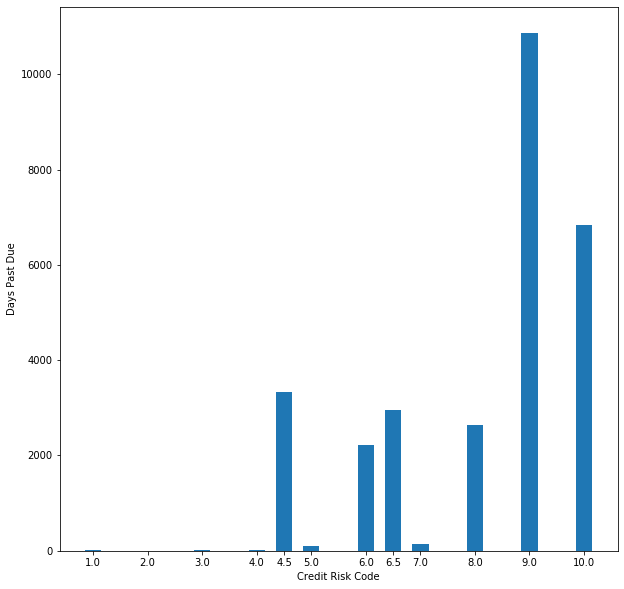

In [17]:
plt.subplots(figsize=(10,10))
print(df.groupby('Credit Risk Code')['Days Past Due'].mean())
plt.bar(df.groupby('Credit Risk Code')['Days Past Due'].mean().index,
        df.groupby('Credit Risk Code')['Days Past Due'].mean().values,
       align='center',
       width=0.3)
plt.xlabel('Credit Risk Code')
plt.ylabel('Days Past Due')
plt.xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])

# Days Past Due Weighted

Text(0.5, 0, 'Credit Risk Code')

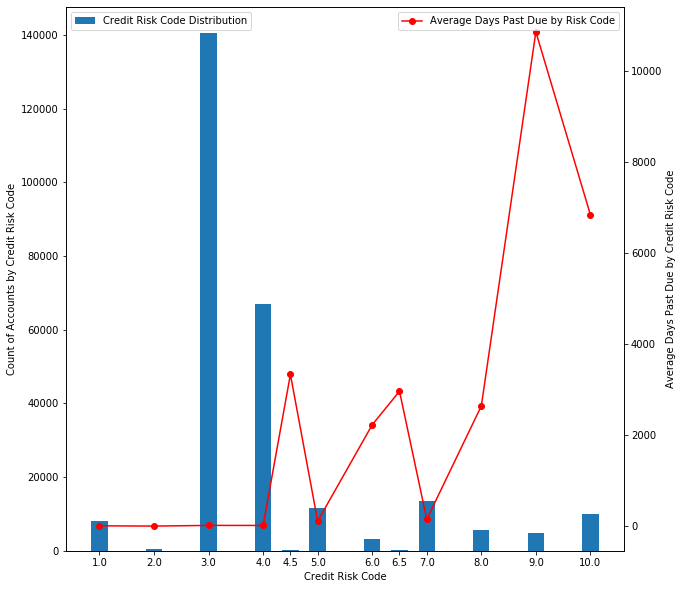

In [25]:
fig, ax1 = plt.subplots(figsize=(10,10))

ax2 = ax1.twinx()
ax1.bar(df.groupby('Credit Risk Code').size().index,
        df.groupby('Credit Risk Code').size().values,
       align='center',
       width=0.3)
ax2.plot(df.groupby('Credit Risk Code')['Days Past Due'].mean().index,
        df.groupby('Credit Risk Code')['Days Past Due'].mean().values,
        'r-o')
ax1.set_ylabel('Count of Accounts by Credit Risk Code')
ax2.set_ylabel('Average Days Past Due by Credit Risk Code')
ax1.set_xticks([1,2,3,4,4.5,5,6,6.5,7,8,9,10])
ax2.legend(['Average Days Past Due by Risk Code'])
ax1.legend(['Credit Risk Code Distribution'],loc='upper left')
ax1.set_xlabel('Credit Risk Code')

In [19]:
df1 = pd.merge(df.groupby('Credit Risk Code')['Days Past Due'].agg({"Days Past Due":'mean'}),
         pd.DataFrame(df.groupby('Credit Risk Code')[['Credit Risk Code','Days Past Due']].size()),
        left_index=True,
        right_index=True)
df1.columns = ['Days Past Due', 'Count']
df1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Days Past Due,Count
Credit Risk Code,,
1.0,6.491475,8035
2.0,0.402778,432
3.0,15.590433,140463
4.0,14.562573,67042
4.5,3334.509804,102
5.0,108.579876,11568
6.0,2227.208414,3090
6.5,2964.301075,186
7.0,148.341836,13565
